In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
import nltk
import sklearn
from textblob import TextBlob
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer



# Data Collection

In [2]:
data=pd.read_csv(r"C:\Users\Afrin\Downloads\Emotion_classify_Data.csv")

In [3]:
df=data.copy()

In [4]:
df

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


# EDA To understand data

In [5]:
df.shape        # the data has 5937 datapoints and 2 variables

(5937, 2)

In [6]:
df["Emotion"].value_counts()   # the dataset is slightly imbalanced

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

In [7]:
df.info()     # the data has no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [8]:
df.duplicated().sum()  # the data has no duplicates

0

In [9]:
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


# Text- Pre processing

In [10]:
feature_var=df.iloc[:,0]
class_var=df.iloc[:,-1]

In [11]:
feature_var

0       i seriously hate one subject to death but now ...
1                      im so full of life i feel appalled
2       i sit here to write i start to dig out my feel...
3       ive been really angry with r and i feel like a...
4       i feel suspicious if there is no one outside l...
                              ...                        
5932                   i begun to feel distressed for you
5933    i left feeling annoyed and angry thinking that...
5934    i were to ever get married i d have everything...
5935    i feel reluctant in applying there because i w...
5936    i just wanted to apologize to you because i fe...
Name: Comment, Length: 5937, dtype: object

In [12]:
def edat(data,name):    
    case=" ".join(data[name]).islower()
    html_tags=data[name].apply(lambda x:True if re.search("<.+?",x)else False).sum()
    urls_=data[name].apply (lambda x :True if re.search("http[s]?://.+? +", x)else False).sum()
    unwanted_=data[name].apply (lambda x :True if re.search("[]()/{}*\-.,@#$%^&0-9[!_]",x)else False).sum()
    if case==False:
        print("not in lower case")
    if html_tags>0:
        print("have html tags")
    if urls_>0:
        print("data has URLs")
    if unwanted_>0:
        print("data has unwanted symbols")

In [13]:
#edat(feature_var,"Comment")

In [14]:
stp=stopwords.words("english") 
stp.remove("not")

In [15]:
stp

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
# remove stop words length less than 2

In [17]:
class_var= class_var.map({"fear": 0, "anger": 1, "joy": 2})

In [18]:
class_var.head()

0    0
1    1
2    0
3    2
4    0
Name: Emotion, dtype: int64

# dividing dataset into train, cv and test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(feature_var,class_var,test_size=0.2,random_state=1,stratify=class_var)

In [21]:
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.2,random_state=1,stratify=y_train)

In [22]:
data_eda=pd.concat([x_train,y_train],axis=1)   # merging to do EDA

In [23]:
data_eda

,Comment,Emotion
4002,i am definitely feeling the festive vibe and i...,2
2259,i feel so paranoid i don t want to feel like i...,0
5750,i joke about her leaving me or tell her that i...,0
923,i hope i feel mellow well fed well slept at pe...,2
2381,i feel a litte shaken up by this point,0
...,...,...
5580,i tell myself that whenever i feel hesitant to...,0
2697,im not always able capture the essence of the ...,0
1960,im feeling really quite angry,1
3296,im glad that peter doesnt feel threatened or c...,0


In [24]:
# dividing the data into groups

In [25]:
gb=data_eda.groupby("Emotion")

In [26]:
gb.get_group(1)["Comment"]

1159    i was feeling stressed or run down to support ...
2949    i am feeling that he does i wonder if such a d...
1209             i get angry at myself when i feel bitter
2714    i feel like i only get mad if i think someones...
869     i was feeling quite impatient and must have hi...
                              ...                        
5821    i just feel like no one cares and no one can b...
4542    i was feeling pretty cranky and down and all i...
3688                                    im feeling cranky
1960                        im feeling really quite angry
4801               i was feeling impatient and took pills
Name: Comment, Length: 1280, dtype: object

In [27]:
from collections import Counter

In [28]:
# getting most common words of each category

In [29]:
Counter(" ".join(gb.get_group(0)["Comment"]).split()).most_common(10)

[('i', 1985),
 ('feel', 782),
 ('to', 723),
 ('and', 721),
 ('the', 665),
 ('a', 538),
 ('feeling', 467),
 ('of', 396),
 ('that', 351),
 ('my', 336)]

In [30]:
Counter(" ".join(gb.get_group(1)["Comment"]).split()).most_common(10)

[('i', 2128),
 ('feel', 878),
 ('and', 760),
 ('to', 673),
 ('the', 657),
 ('a', 465),
 ('feeling', 429),
 ('that', 399),
 ('of', 359),
 ('my', 332)]

In [31]:
Counter(" ".join(gb.get_group(2)["Comment"]).split()).most_common(10)

[('i', 2045),
 ('feel', 942),
 ('and', 811),
 ('to', 760),
 ('the', 728),
 ('a', 500),
 ('that', 452),
 ('of', 402),
 ('feeling', 365),
 ('in', 345)]

In [32]:
# creating a no.of words column to check the count of words present in each line

In [33]:
data_eda["no_of_words"]=data_eda["Comment"].apply(lambda x:len(x.split()))

In [34]:
data_eda

,Comment,Emotion,no_of_words
4002,i am definitely feeling the festive vibe and i...,2,45
2259,i feel so paranoid i don t want to feel like i...,0,17
5750,i joke about her leaving me or tell her that i...,0,53
923,i hope i feel mellow well fed well slept at pe...,2,17
2381,i feel a litte shaken up by this point,0,9
...,...,...,...
5580,i tell myself that whenever i feel hesitant to...,0,12
2697,im not always able capture the essence of the ...,0,32
1960,im feeling really quite angry,1,5
3296,im glad that peter doesnt feel threatened or c...,0,26


<Axes: ylabel='Frequency'>

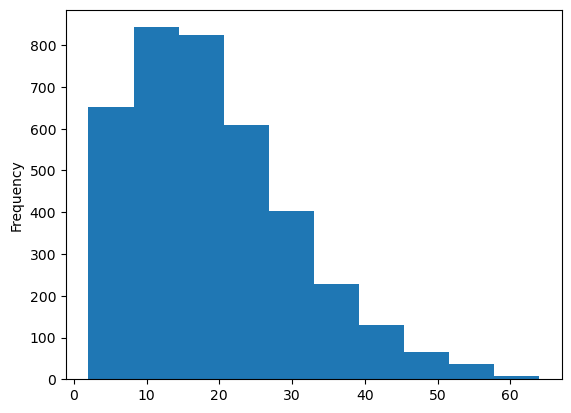

In [35]:
data_eda["no_of_words"].plot(kind="hist")

In [36]:
from wordcloud import WordCloud

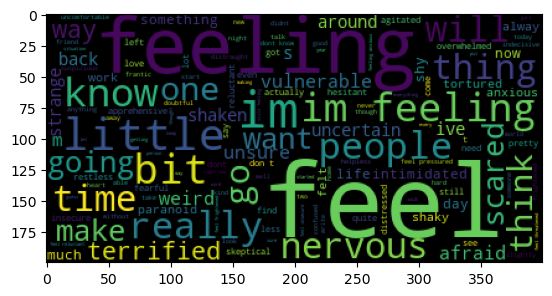

In [37]:
wc=WordCloud().generate(" ".join(gb.get_group(0)["Comment"]))
plt.imshow(wc)
plt.show()

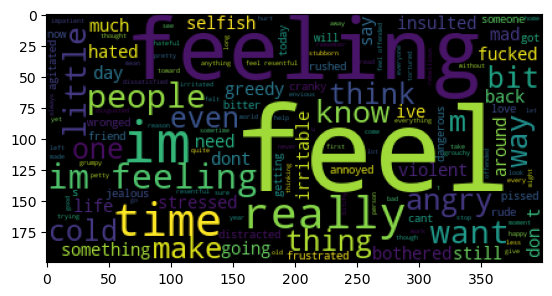

In [38]:
wc=WordCloud().generate(" ".join(gb.get_group(1)["Comment"]))
plt.imshow(wc)
plt.show()

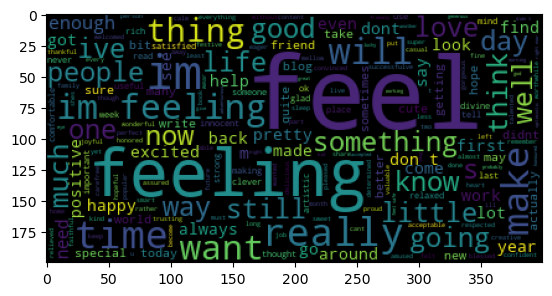

In [39]:
wc=WordCloud().generate(" ".join(gb.get_group(2)["Comment"]))
plt.imshow(wc)
plt.show()

# Bernoulli Naive Bayes

In [40]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [41]:
cv2=CountVectorizer(binary=True)  # binary  bag of words
fb_xtrain=cv2.fit_transform(x_train)
fb_cv=cv2.transform(x_cv)
fb_xtest=cv2.transform(x_test)

In [42]:
from sklearn.naive_bayes import BernoulliNB , MultinomialNB,CategoricalNB
from sklearn.metrics import accuracy_score

In [43]:
# here we are using binary bag of words for bernoulli

b=BernoulliNB(alpha=1.0) # created a bernouli with aplha as 1
model = b.fit(fb_xtrain,y_train)
predict=model.predict(fb_xtest)
accuracy_score(y_test,predict)

0.8804713804713805

In [44]:
tr_error=[]
for alpha in range(1,100):
    b=BernoulliNB(alpha=alpha)
    model = b.fit(fb_xtrain,y_train)
    error=1-accuracy_score(y_train,model.predict(fb_xtrain))
    tr_error.append(error)


In [45]:
test_error=[]
for alpha in range(1,100):
    b=BernoulliNB(alpha=alpha)
    model = b.fit(fb_xtrain,y_train)
    error1=1-accuracy_score(y_cv,model.predict(fb_cv))
    test_error.append(error1)

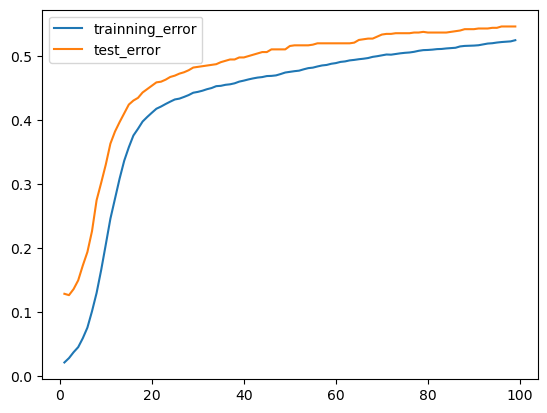

In [46]:
plt.plot(range(1,100),tr_error,label="trainning_error")
plt.plot(range(1,100),test_error,label="test_error")
plt.legend()
plt.show()

# Multinomial Naive Bayes

In [47]:
cv1=CountVectorizer()  # bag of words
f_xtrain=cv1.fit_transform(x_train)
f_cv=cv1.transform(x_cv)
f_xtest=cv1.transform(x_test)

In [48]:
tr_error=[]
for alpha in range(1,100):
    b=MultinomialNB(alpha=alpha)
    model=b.fit(f_xtrain,y_train)
    error=1-accuracy_score(y_train,model.predict(f_xtrain))
    tr_error.append(error)


In [49]:
test_error=[]
for alpha in range(1,100):
    b=MultinomialNB(alpha=alpha)
    model=b.fit(f_xtrain,y_train)
    error1=1-accuracy_score(y_cv,model.predict(f_cv))
    test_error.append(error1)

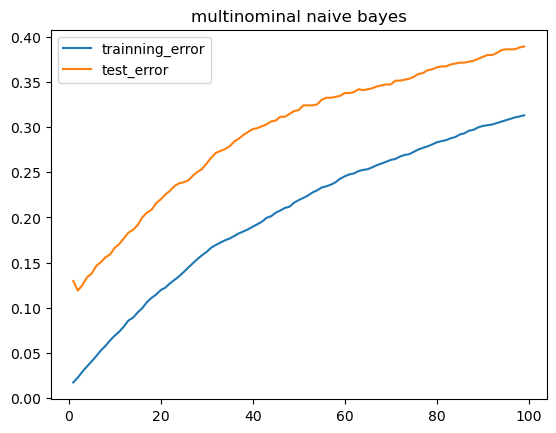

In [50]:
plt.plot(range(1,100),tr_error,label="trainning_error")
plt.plot(range(1,100),test_error,label="test_error")
plt.legend()
plt.title("multinominal naive bayes")
plt.show()

# Categotical Naive Bayes

In [51]:
cv3=CountVectorizer()  # Bag of words
train=cv3.fit_transform(x_train)
cv=cv3.transform(x_cv)
test=cv3.transform(x_test)

In [52]:
tr_error=[]
for alpha in range(1,100):
    b=CategoricalNB(alpha=alpha)
    model=b.fit(train.toarray(),y_train)
    error=1-accuracy_score(y_train,model.predict(train.toarray()))
    tr_error.append(error)


In [53]:
cv_error=[]
for alpha in range(1,100):
    b=CategoricalNB(alpha=alpha, min_categories=10)
    model=b.fit(train.toarray(),y_train)
    error1=1-accuracy_score(y_cv,model.predict(cv.toarray()))
    test_error.append(error1)

In [55]:
train=cv2.fit_transform(x_train)
cv=cv2.transform(x_cv)
test=cv2.transform(x_test)


In [56]:
b=BernoulliNB(alpha=7)
model = b.fit(fb_xtrain,y_train)
accuracy_score(y_test,model.predict(test))

0.7912457912457912

In [57]:
b=MultinomialNB(alpha=7)
model=b.fit(train,y_train)
accuracy_score(y_test,model.predict(test))

0.8703703703703703

In [58]:
b=CategoricalNB(alpha=7)
model=b.fit(train.toarray(),y_train)
accuracy_score(y_test,model.predict(test.toarray()))

0.7912457912457912